# Timothy Carey
## 10/9/2025
### Project 2 WebScraped Data Analysis
#### The purpose of this program is to scrape data from the selected web pages, generate files from the selected datasets, then perform data analysis of questions selected from part 1 of our project. 

##### The website we'll be scraping data from (Data scraped is from 11/9/2025):
##### Box Office Mojo website - https://www.boxofficemojo.com/

##### The webpages we'll be scraping data from:
##### Domestic box office for 2025
###### https://www.boxofficemojo.com/year/2025/?ref_=bo_yl_table_1
##### Domestic box office for 2024
###### https://www.boxofficemojo.com/year/2024/?ref_=bo_yl_table_2
##### Latest International Weekends
###### https://www.boxofficemojo.com/intl/?ref_=bo_nb_csm_tab
##### Domestic Box Office Weekend for 2024
###### https://www.boxofficemojo.com/weekend/by-year/2024/

#### ____________________

##### Data Science Questions listed below: 

##### In the 2025 Domestic box office dataset, (as of date pulled) in each 'Release Date' month, what movie had the greatest total gross income, and what distributor did it belong to?

##### In the 2024 Domestic box office dataset, do the top monthly distributors match 2025? If not compare by month and year which distributor performed better, and for what movie?

##### In the Latest International Weekends dataset, which countries ('Area') had the biggest 'Weekend Gross'? What were the distributors?

##### In the Domestic Box Office Weekends for 2024, which weekends per month had the greatest Overall Gross revenue?


In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define function to scrape data and ensure it's string, not other classes
def string_conversion(raw):
    if raw is None:
        return ""
    text = raw.get_text(strip = True)
    return text if text else str(raw.get('href', ''))



##### DOMESTIC BOX OFFICE 2025 Webscrape #####



In [2]:
# Url request for domestic box office 2025
url='https://www.boxofficemojo.com/year/2025/?ref_=bo_yl_table_1'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Error: code {status}")


In [3]:
# Defining our requests for scraping data, converting it into string and appending to our dataframe
table = soup.find('table')
rows = table.find_all('tr')

domestic_box_25 = []

for row in rows[1:]:
    cols = row.find_all('td')

    if len(cols) <10:
        continue

    release = cols[1].text.strip()
    total_gross = cols[7].text.strip()
    release_date = cols[8].text.strip()
    distributor = cols[9].text.strip()

    domestic_box_25.append([release, total_gross, release_date, distributor])

# Defining our dataframe with the data received, converting data to currency and date format, and adding 'Release Month' for analytical purposes
domestic_box_25_df = pd.DataFrame(domestic_box_25, columns=['Release', 'Total Gross', 'Release Date', 'Distributor'])

domestic_box_25_df['Total Gross'] = (domestic_box_25_df['Total Gross'].replace('[\$,]', '', regex=True).astype(float))
domestic_box_25_df['Release Date'] = pd.to_datetime(domestic_box_25_df['Release Date'] + ' 2025', format='%b %d %Y', errors='coerce')

domestic_box_25_df['Release Month'] = domestic_box_25_df['Release Date'].dt.month_name()

domestic_box_25_df.to_csv('Domestic_Box_Office_2025.csv', index = False)
D_Box_25 = pd.read_csv('Domestic_Box_Office_2025.csv')

D_Box_25.head()


,Release,Total Gross,Release Date,Distributor,Release Month
0,A Minecraft Movie,423949195.0,2025-04-04,Warner Bros.,April
1,Lilo & Stitch,423778855.0,2025-05-23,Walt Disney Studios Motion Pictures,May
2,Superman,354184465.0,2025-07-11,Warner Bros.,July
3,Jurassic World: Rebirth,339640400.0,2025-07-02,Universal Pictures,July
4,Sinners,279653537.0,2025-04-18,Warner Bros.,April


##### DOMESTIC BOX OFFICE 2024 Webscrape #####



In [4]:
# Url request for domestic box office 2024
url='https://www.boxofficemojo.com/year/2024/?ref_=bo_yl_table_2'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Error: code {status}")


In [5]:
# Defining our requests for scraping data, converting it into string and appending to our dataframe
table = soup.find('table')
rows = table.find_all('tr')

domestic_box_24 = []

for row in rows[1:]:
    cols = row.find_all('td')

    if len(cols) <10:
        continue

    release = cols[1].text.strip()
    total_gross = cols[7].text.strip()
    release_date = cols[8].text.strip()
    distributor = cols[9].text.strip()

    domestic_box_24.append([release, total_gross, release_date, distributor])

# Defining our dataframe with the data received, converting data to currency and date format, and adding 'Release Month' for analytical purposes
domestic_box_24_df = pd.DataFrame(domestic_box_24, columns=['Release', 'Total Gross', 'Release Date', 'Distributor'])

domestic_box_24_df['Total Gross'] = (domestic_box_24_df['Total Gross'].replace('[\$,]', '', regex=True).astype(float))
domestic_box_24_df['Release Date'] = pd.to_datetime(domestic_box_24_df['Release Date'] + ' 2024', format='%b %d %Y', errors='coerce')

domestic_box_24_df['Release Month'] = domestic_box_24_df['Release Date'].dt.month_name()

domestic_box_24_df.to_csv('Domestic_Box_Office_2024.csv', index = False)
D_Box_24 = pd.read_csv('Domestic_Box_Office_2024.csv')

D_Box_24.head()


,Release,Total Gross,Release Date,Distributor,Release Month
0,Inside Out 2,652980194.0,2024-06-14,Walt Disney Studios Motion Pictures,June
1,Deadpool & Wolverine,636745858.0,2024-07-26,Walt Disney Studios Motion Pictures,July
2,Wicked,473231120.0,2024-11-22,Universal Pictures,November
3,Moana 2,460405297.0,2024-11-27,Walt Disney Studios Motion Pictures,November
4,Despicable Me 4,361004205.0,2024-07-03,Universal Pictures,July


##### INTERNATIONAL WEEKENDS Webscrape #####



In [6]:
# Url request for International weekends dataset
url='https://www.boxofficemojo.com/intl/?ref_=bo_nb_csm_tab'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Error: code {status}")


In [7]:
# Defining our requests for scraping data, converting it into string and appending to our dataframe
international_weekend = []

rows_no_table = soup.find_all('tr')

for row in rows_no_table [2:]:

    area_raw = row.find('a', class_='a-link-normal')
    weekend_raw = row.find('td', class_='mojo-field-type-date_interval')
    distribution_raw = row.find('a', target='_blank')
    wk_gross_raw = row.find('td', class_='mojo-field-type-money')

    area = string_conversion(area_raw)
    weekend = string_conversion(weekend_raw)
    distribution = string_conversion(distribution_raw)
    wk_gross = string_conversion(wk_gross_raw)
    
    international_weekend.append([area, weekend, distribution, wk_gross])

# Defining our dataframe with the data received, converting data to currency format for analytical purposes
international_weekend_df = pd.DataFrame(international_weekend, columns=['Area', 'Weekend Date', 'Distributor', 'Weekend Gross'])

international_weekend_df = (international_weekend_df.replace('', pd.NA).dropna(subset=['Area']).reset_index(drop=True))
international_weekend_df['Weekend Gross'] = pd.to_numeric(international_weekend_df['Weekend Gross'].replace('[\$,]', '', regex=True), errors='coerce')

international_weekend_df.to_csv('International_Weekend_2025.csv', index = False)
INT_weekend = pd.read_csv('International_Weekend_2025.csv')

INT_weekend.head()


,Area,Weekend Date,Distributor,Weekend Gross
0,China,Nov 7-9,Walt Disney Studios Motion Pictures,7400000.0
1,United Kingdom,Nov 7-9,Sony Pictures Releasing,1200000.0
2,Japan,Nov 1-2,Toho,2861434.0
3,France,Oct 29-Nov 2,Haut et Court,2339399.0
4,Italy,Oct 30-Nov 2,Medusa Distribuzione,2071186.0


##### DOMESTIC 2024 WEEKENDS Webscrape #####



In [8]:
# Url request for Domestic 2024 weekends dataset
url='https://www.boxofficemojo.com/weekend/by-year/2024/'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Error: code {status}")


In [9]:
# Defining our requests for scraping data, converting it into string and appending to our dataframe
domestic_weekend = []

rows_no_table = soup.find_all('tr')

for row in rows_no_table [1:]:

    dates_raw = row.find('a', class_='a-link-normal')
    overall_gross_raw = row.find('td', class_='mojo-field-type-money')
    releases_raw = row.find('td', class_='mojo-field-type-positive_integer')

    dates = string_conversion(dates_raw)
    overall_gross = string_conversion(overall_gross_raw)
    releases = string_conversion(releases_raw)
    
    domestic_weekend.append([dates, overall_gross, releases])

# Defining our dataframe with the data received, converting data to currency format, and adding 'Release Month' for analytical purposes
domestic_weekend_df = pd.DataFrame(domestic_weekend, columns=['Dates', 'Overall Gross', '# Releases'])

domestic_weekend_df = (domestic_weekend_df.replace('', pd.NA).dropna(subset=['Dates']).reset_index(drop=True))
domestic_weekend_df['Overall Gross'] = pd.to_numeric(domestic_weekend_df['Overall Gross'].replace('[\$,]', '', regex=True), errors='coerce')

domestic_weekend_df['Release Month'] = domestic_weekend_df['Dates'].str[:3]

domestic_weekend_df.to_csv('Domestic_Weekend_2025.csv', index = False)
DOM_weekend = pd.read_csv('Domestic_Weekend_2025.csv')

DOM_weekend.head()


,Dates,Overall Gross,# Releases,Release Month
0,Dec 27-29,159403178,90,Dec
1,Dec 20-22,139944015,61,Dec
2,Dec 13-15,87557182,71,Dec
3,Dec 6-8,129558686,68,Dec
4,Nov 29-Dec 1,274782835,53,Nov


#### DATA SCIENCE QUESTIONS ####

###### In the 2025 Domestic box office dataset, (as of date pulled) in each 'Release Date' month, what movie had the greatest total gross income, and what distributor did it belong to?

###### See below 'top_releases_monthly_25' dataset & barchart


In [10]:
# Grouping our dataframe by month to determine top 2025 domestic movies by month
top_releases_monthly_25 = D_Box_25.loc[
    D_Box_25.groupby('Release Month')['Total Gross'].idxmax(),
    ['Release Month', 'Release', 'Total Gross', 'Distributor', 'Release Date']].sort_values('Release Month').reset_index(drop=True)

top_releases_monthly_25


,Release Month,Release,Total Gross,Distributor,Release Date
0,April,A Minecraft Movie,423949195.0,Warner Bros.,2025-04-04
1,August,Weapons,151550044.0,Warner Bros.,2025-08-08
2,December,Mufasa: The Lion King,254567693.0,Walt Disney Studios Motion Pictures,2025-12-20
3,February,Captain America: Brave New World,200500001.0,Walt Disney Studios Motion Pictures,2025-02-14
4,January,Dog Man,97970355.0,Universal Pictures,2025-01-31
5,July,Superman,354184465.0,Warner Bros.,2025-07-11
6,June,How to Train Your Dragon,262958100.0,Universal Pictures International (UPI),2025-06-13
7,March,Snow White,87203963.0,Walt Disney Studios Motion Pictures,2025-03-21
8,May,Lilo & Stitch,423778855.0,Walt Disney Studios Motion Pictures,2025-05-23
9,November,Wicked,473231120.0,Universal Pictures,2025-11-22


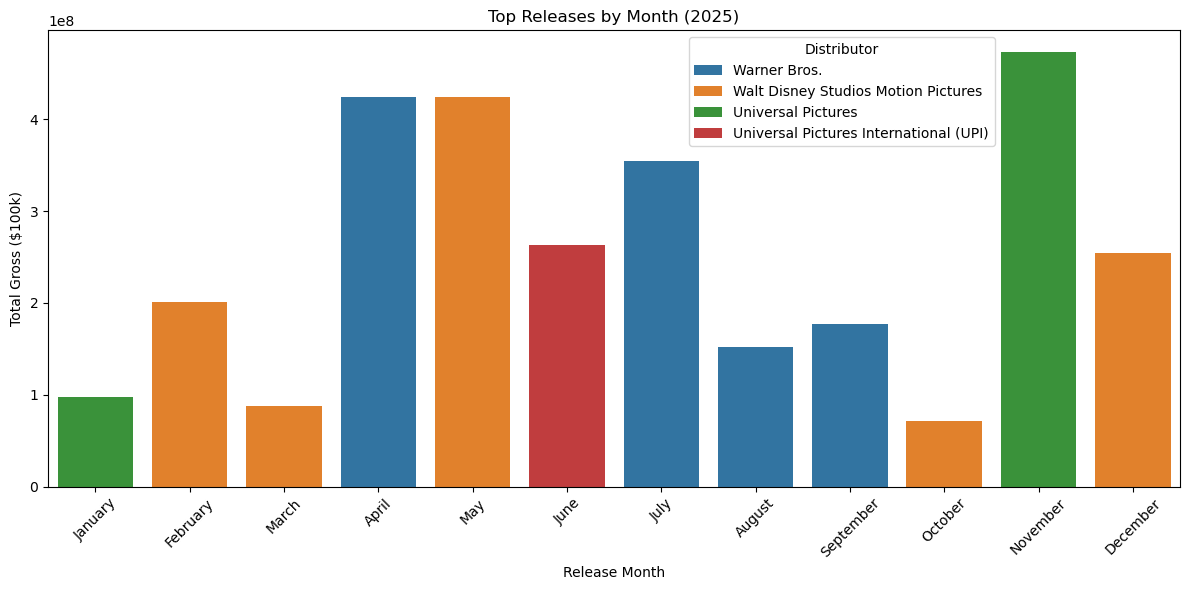

In [11]:
# Plotting our data in a bar graph to compare Distributors 
plt.figure(figsize=(12, 6))
sns.barplot(data = top_releases_monthly_25, x='Release Month', y='Total Gross', hue='Distributor', order=month_order)

plt.title('Top Releases by Month (2025)')
plt.xlabel('Release Month')
plt.ylabel('Total Gross ($100k)')
plt.xticks(rotation=45)
plt.legend(title='Distributor', bbox_to_anchor = (.56, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### In the 2024 Domestic box office dataset, do the top monthly distributors match 2025? If not compare by month and year which distributor performed better, and for what movie?

##### The top monthly distributors do not match and it appears in more recent data, Warner Bros, Walt Disney Studios, Univeral Pictures, and UPI have knocked down their previous years (2024) competitors. See below 'top_releases_monthly_24' dataset and barchart


In [12]:
# Grouping our dataframe by month to determine top 2025 domestic movies by month
top_releases_monthly_24 = D_Box_24.loc[
    D_Box_24.groupby('Release Month')['Total Gross'].idxmax(),
    ['Release Month', 'Release', 'Total Gross', 'Distributor', 'Release Date']].sort_values('Release Month').reset_index(drop=True)

top_releases_monthly_24


,Release Month,Release,Total Gross,Distributor,Release Date
0,April,Civil War,68756072.0,A24,2024-04-12
1,August,It Ends with Us,148518266.0,Sony Pictures Releasing,2024-08-09
2,December,Mufasa: The Lion King,254567693.0,Walt Disney Studios Motion Pictures,2024-12-20
3,February,Bob Marley: One Love,96981216.0,Paramount Pictures,2024-02-14
4,January,Mean Girls,72581770.0,Paramount Pictures,2024-01-12
5,July,Deadpool & Wolverine,636745858.0,Walt Disney Studios Motion Pictures,2024-07-26
6,June,Inside Out 2,652980194.0,Walt Disney Studios Motion Pictures,2024-06-14
7,March,Dune: Part Two,282144358.0,Warner Bros.,2024-03-01
8,May,Kingdom of the Planet of the Apes,171130165.0,20th Century Studios,2024-05-10
9,November,Wicked,473231120.0,Universal Pictures,2024-11-22


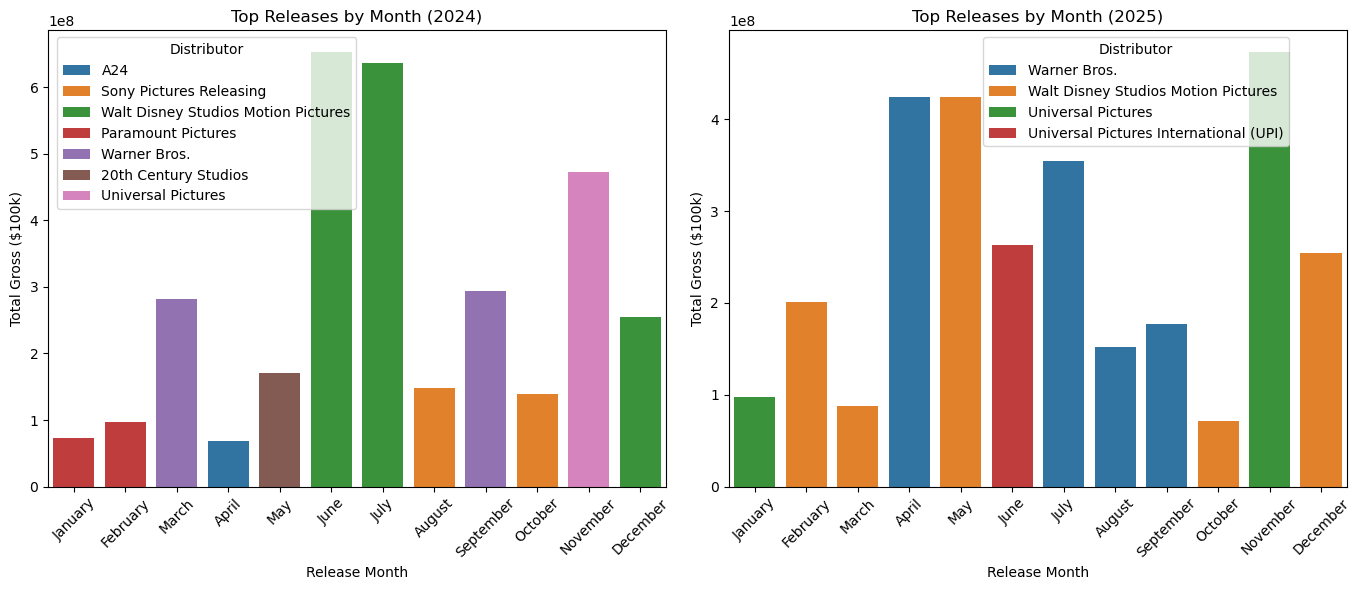

In [13]:
# Plots to compare Distributor successes in 2024 & 2025
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = top_releases_monthly_24, x='Release Month', y='Total Gross', hue='Distributor', order=month_order, ax=axes[0])
axes[0].set_title('Top Releases by Month (2024)')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('Total Gross ($100k)')
axes[0].legend(title='Distributor', bbox_to_anchor = (.51, 1), loc='upper right')
axes[0].tick_params(axis = 'x', rotation=45)

sns.barplot(data = top_releases_monthly_25, x='Release Month', y='Total Gross', hue='Distributor', order=month_order, ax=axes[1])
axes[1].set_title('Top Releases by Month (2025)')
axes[1].set_xlabel('Release Month')
axes[1].set_ylabel('Total Gross ($100k)')
axes[1].legend(title='Distributor', bbox_to_anchor = (.40, 1), loc='upper left')
axes[1].tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()


##### In the Latest International Weekends dataset, which countries ('Area') had the biggest 'Weekend Gross'? What were the distributors?

###### See below 'INT_wkend_distributors' dataset; Walt Disney Studios in China had the greatest weekend from November 7th-9th, while Italia Film in Iraq had the least form October 24th-26th

In [14]:
# Grouping our dataframe by Weekend Date to determine top International weekend gross by Distributor
# Data pulled as of 11.9.2025

INT_wkend_distributors = INT_weekend.loc[INT_weekend.groupby('Weekend Date')['Weekend Gross'].idxmax(),
['Weekend Date', 'Area', 'Distributor', 'Weekend Gross']].sort_values('Weekend Date').reset_index(drop=True)

INT_wkend_distributors


,Weekend Date,Area,Distributor,Weekend Gross
0,Nov 1-2,Japan,Toho,2861434.0
1,Nov 7-9,China,Walt Disney Studios Motion Pictures,7400000.0
2,Oct 24-26,Iraq,Italia Film,1665.0
3,Oct 29-Nov 2,France,Haut et Court,2339399.0
4,Oct 30-Nov 2,Italy,Medusa Distribuzione,2071186.0
5,Oct 31-Nov 2,South Korea,NaN,1547683.0


##### In the Domestic Box Office Weekends for 2024, which weekends per month had the greatest Overall Gross revenue?

###### See 'top_domestic_wkends' dataset below; July 26th-28th had the greatest weekend overall during the 2025 year, while April 5th-7th had the least

In [15]:
# Grouping our dataframe by Release Month to determine top Domestic weekend gross by month
gross_by_weekend = DOM_weekend.groupby(['Release Month', 'Dates'])['Overall Gross'].sum().reset_index()

idx = gross_by_weekend.groupby('Release Month')['Overall Gross'].idxmax()

top_domestic_wkends = gross_by_weekend.loc[idx].reset_index(drop=True)

top_domestic_wkends


,Release Month,Dates,Overall Gross
0,Apr,Apr 5-7,81139811
1,Aug,Aug 2-4,166647076
2,Dec,Dec 27-29,159403178
3,Feb,Feb 16-19,82733326
4,Jan,Jan 12-15,102444462
5,Jul,Jul 26-28,283134352
6,Jun,Jun 14-16,211060110
7,Mar,Mar 29-Apr 1,144556947
8,May,May 24-27,126848103
9,Nov,Nov 27-Dec 1,421199078
